## Find the Spectrum of the signal using Linear Predictive Analysis

In [9]:
# Importing all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import scipy
import librosa
from scipy import linalg


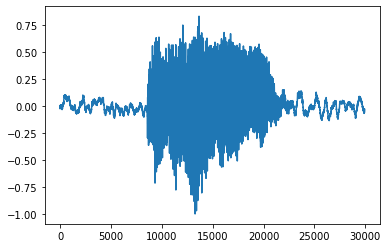

In [10]:
fs, audio = wav.read("a_16_1.wav")
audio_normalised = audio/np.max(np.abs(audio))
plt.plot(audio_normalised)


In [11]:
# Defining the window and hop size
frame_size = 30   #ms
hop_size = 10     #ms
# window_type = np.hamming()
window_size = int(frame_size*fs/1000) #512
window_hop_size = int(hop_size*fs/1000) 
window_type = np.hamming(window_size)

print(window_size)
print(window_hop_size)


480
160


480


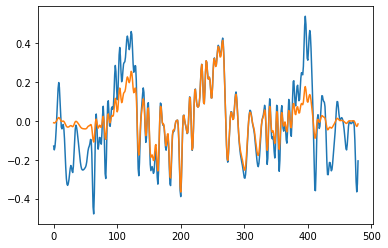

In [12]:
# Let take a Short Window of the Signal for Computation of LPC

windowed_audio_signal = audio_normalised[10000:10000+window_size]
plt.plot(windowed_audio_signal)
#  Multiplying the signal with an Hamming Window
hamm_window_audio_signal = np.multiply(window_type,windowed_audio_signal)
plt.plot(hamm_window_audio_signal)
print(len(hamm_window_audio_signal))



In [1]:
# This below code for finding the LPC using the Autocorrelation Method

# Now we need to Find the Coefficient of LPC ---> Using the Autocorrelation Method

autocorr = np.correlate(hamm_window_audio_signal,hamm_window_audio_signal,mode='full')

x = abs(autocorr[480-1:])
#plt.plot(x)

# Defining th order of LPC Coefficients

P = 20

# Finding the LPC Coefficient  A.R = -r ---> A =  -inv(R)*r where R - Toeplitz Matrix
R = autocorr[:P]

R_toeplitz = scipy.linalg.toeplitz(R,r = None)
# print((R_toeplitz))

r = autocorr[1:P+1] 

print(R_toeplitz.shape)
print(r.shape)

LPC_coeff = np.multiply(np.linalg.inv(R_toeplitz),r)

LPC_coeff_spectrum = np.fft.rfft(1/LPC_coeff)

print(LPC_coeff_spectrum.shape)
plt.plot(LPC_coeff_spectrum)

# Unable to Complete this Step, need further time to analyse and solve the equation




NameError: name 'np' is not defined

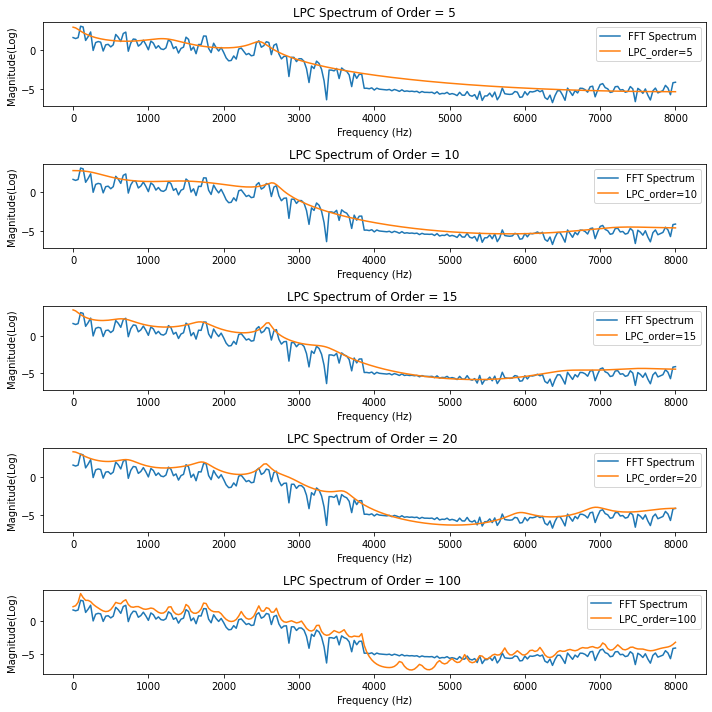

In [82]:
# LPC Coefficent by Librosa Method

y = librosa.lpc(hamm_window_audio_signal,order = 20)
fft_window_signal = np.fft.rfft(hamm_window_audio_signal)
N = len(windowed_audio_signal)
bins = np.fft.rfftfreq(N,1/fs)
n_samples = 2*len(fft_window_signal)-1


# For Different Order 

# P = 10

y1 = librosa.lpc(hamm_window_audio_signal,order=5)
y2 = librosa.lpc(hamm_window_audio_signal,order=10)
y3 = librosa.lpc(hamm_window_audio_signal,order=15)
y4 = librosa.lpc(hamm_window_audio_signal,order=100)


LPC_Spectrum_order5 = 0.1/np.abs(np.fft.rfft(y1,n_samples))
LPC_Spectrum_order10 = 0.1/np.abs(np.fft.rfft(y2,n_samples))
LPC_Spectrum_order15 = 0.1/np.abs(np.fft.rfft(y3,n_samples))
LPC_Spectrum_order20 = 0.1/np.abs(np.fft.rfft(y,n_samples))   # Where 0.1 is the gain of the Spectrum----> Refering the Slide https://web.ece.ucsb.edu/Faculty/Rabiner/ece259/digital%20speech%20processing%20course/lectures_new/Lecture%2013_winter_2012_6tp.pdf
LPC_Spectrum_order100 = 0.1/np.abs(np.fft.rfft(y4,n_samples))

# plt.plot(bins,np.log(np.abs(LPC_Spectrum_order10)))

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams["figure.autolayout"] = True

plt.subplot(511)
plt.plot(bins , np.log(np.abs(fft_window_signal)))
plt.plot(bins,np.log(np.abs(LPC_Spectrum_order5)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude(Log)')
plt.title('LPC Spectrum of Order = 5')
plt.legend(('FFT Spectrum','LPC_order=5'))


plt.subplot(512)
plt.plot(bins , np.log(np.abs(fft_window_signal)))
plt.plot(bins,np.log(np.abs(LPC_Spectrum_order10)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude(Log)')
plt.title('LPC Spectrum of Order = 10')
plt.legend(('FFT Spectrum','LPC_order=10'))


plt.subplot(513)
plt.plot(bins , np.log(np.abs(fft_window_signal)))
plt.plot(bins,np.log(np.abs(LPC_Spectrum_order15)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude(Log)')
plt.title('LPC Spectrum of Order = 15 ')
plt.legend(('FFT Spectrum','LPC_order=15'))

plt.subplot(514)
plt.plot(bins , np.log(np.abs(fft_window_signal)))
plt.plot(bins,np.log(np.abs(LPC_Spectrum_order20)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude(Log)')
plt.title('LPC Spectrum of Order = 20 ')
plt.legend(('FFT Spectrum','LPC_order=20'))

plt.subplot(515)
plt.plot(bins , np.log(np.abs(fft_window_signal)))
plt.plot(bins,np.log(np.abs(LPC_Spectrum_order100)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude(Log)')
plt.title('LPC Spectrum of Order = 100 ')
plt.legend(('FFT Spectrum','LPC_order=100'))


plt.show()
